In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA

In [2]:
raw_data = pd.read_csv('Training.csv')
raw_test = pd.read_csv('Testing.csv')
raw_data.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
data = raw_data.drop(['Unnamed: 133'], axis=1)
data.tail(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
data.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [6]:
print(data.isnull().any())

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool


In [7]:
data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [8]:
data['prognosis'].unique().size

41

In [9]:
data['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

Vemos que nuestro set de datos esta limpio, sin faltantes, y nuestros datos para clasificación estan perfectamente equilibrados.

## Codificación de datos categoricos

In [10]:
## Etiquetado de prognosis
from sklearn.preprocessing import LabelEncoder
#data['prognosis'] = data['prognosis'].astype('category')
df_final = data.copy()

encoderLE = LabelEncoder()
df_final['prognosis'] = encoderLE.fit_transform(df_final['prognosis'])

## Datos de entranamiento y validación

In [11]:
from sklearn.model_selection import train_test_split
X = df_final.drop(['prognosis'], axis=1)
Y = df_final['prognosis']

xData = X.values
yData = Y.values

In [12]:
xTrain, xValid, yTrain, yValid = train_test_split(xData, yData, train_size=0.8, test_size=0.2, random_state=42)

## Modelos

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

model_RFC = RandomForestClassifier()
model_RFC.fit(xTrain, yTrain)
yPred_RFC = model_RFC.predict(xValid)

In [14]:
model_SGD = SGDClassifier()
model_SGD.fit(xTrain, yTrain)
yPred_SGD = model_SGD.predict(xValid)

model_LR = LogisticRegression()
model_LR.fit(xTrain, yTrain)
yPred_LR = model_LR.predict(xValid)

## Metricas

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('Random Forest Classifier')
acc_RFC = accuracy_score(yValid, yPred_RFC)
print('Accuracy:', acc_RFC)
pre_RFC = precision_score(yValid, yPred_RFC, average='weighted')
print('Precision:', pre_RFC)
recall_RFC = recall_score(yValid, yPred_RFC, average='weighted')
print('Recall:', recall_RFC)
f1_RFC = f1_score(yValid, yPred_RFC, average='weighted')
print('F1 score:', f1_RFC)

print('\nSGD Classifier')
acc_SGD = accuracy_score(yValid, yPred_SGD)
print('Accuracy:', acc_SGD)
pre_SGD = precision_score(yValid, yPred_SGD, average='weighted')
print('Precision:', pre_SGD)
recall_SGD = recall_score(yValid, yPred_SGD, average='weighted')
print('Recall:', recall_SGD)
f1_SGD = f1_score(yValid, yPred_SGD, average='weighted')
print('F1 score:', f1_SGD)

print('\nLogistic Regression')
acc_LR = accuracy_score(yValid, yPred_LR)
print('Accuracy:', acc_LR)
pre_LR = precision_score(yValid, yPred_LR, average='weighted')
print('Precision:', pre_LR)
recall_LR = recall_score(yValid, yPred_LR, average='weighted')
print('Recall:', recall_LR)
f1_LR = f1_score(yValid, yPred_LR, average='weighted')
print('F1 score:', f1_LR)

Random Forest Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0

SGD Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0

Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


Como podemos ver los modelos funcionan de maravilla.

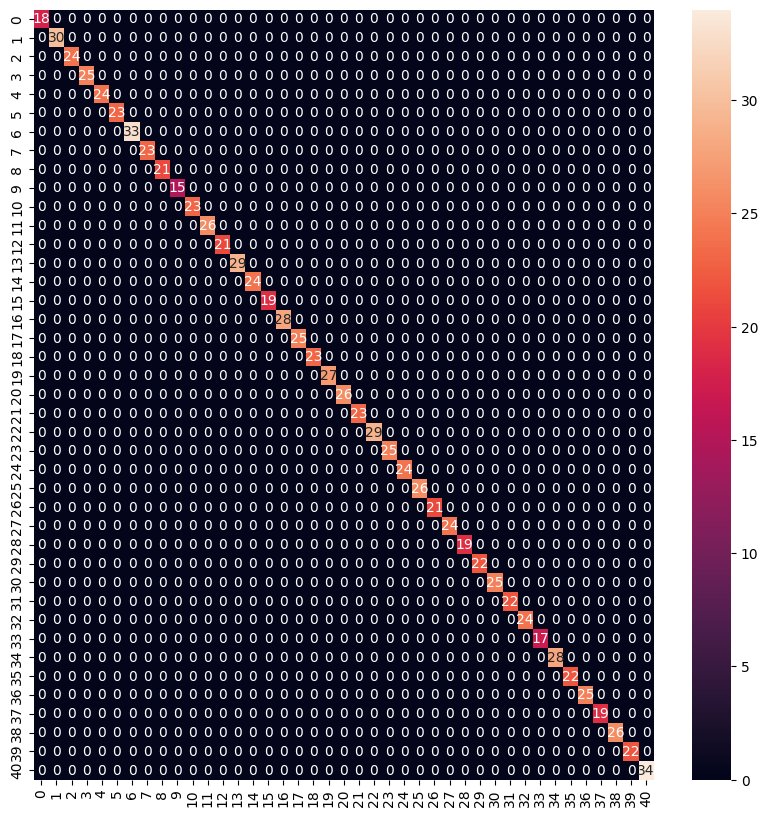

In [16]:
cf_matrix = confusion_matrix(yValid, yPred_RFC)
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True)
plt.show()

## Probando el modelo con la conjunto de datos de Prueba

In [17]:
#from sklearn.preprocessing import LabelEncoder
#data['prognosis'] = data['prognosis'].astype('category')
#df_final = data.copy()

#encoderLE = LabelEncoder()
#df_final['prognosis'] = encoderLE.fit_transform(df_final['prognosis'])

In [22]:
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
 
test_X = test_data.iloc[:, :-1]
test_Y = encoderLE.transform(test_data.iloc[:, -1])

In [24]:
yPred_RFC_Test = model_RFC.predict(test_X)
yPred_SGD_Test = model_SGD.predict(test_X)
yPred_LR_Test = model_LR.predict(test_X)

C:\Users\claud\anaconda3\envs\python3_TF20\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\claud\anaconda3\envs\python3_TF20\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
C:\Users\claud\anaconda3\envs\python3_TF20\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [26]:
print('Random Forest Classifier')
acc_RFC_Test = accuracy_score(test_Y, yPred_RFC_Test)
print('Accuracy:', acc_RFC_Test)


print('\nSGD Classifier')
acc_SGD_Test = accuracy_score(test_Y, yPred_SGD_Test)
print('Accuracy:', acc_SGD_Test)


print('\nLogistic Regression')
acc_LR_Test = accuracy_score(test_Y, yPred_LR_Test)
print('Accuracy:', acc_LR_Test)


Random Forest Classifier
Accuracy: 0.9761904761904762

SGD Classifier
Accuracy: 1.0

Logistic Regression
Accuracy: 1.0
